# Consumer Prices Changes Analysis for Organizing a Furniture Event at 2022

Economists frequently use index numbers when making comparisons over time. An index starts in a given year, the base year, at an index number of 100. In subsequent years, percentage increases push the index number above 100, and percentage decreases push the figure below 100. An index number of 102 means a 2% rise from the base year, and an index number of 98 means a 2% fall.

The goal of this project was to use exploratory data analysis approach to predict the best month to orgnize furnishings, household equipment event in Saudi Arabia  that has the highest consumer prices for furniture and highest arithmetic average over two years in order to help improve event revenue

In [185]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import sqlite3 as sql
import seaborn as sns

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

print("Python Version:", sys.version, '\n')
print("Numpy Version: ", np.__version__)

Python Version: 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ] 

Numpy Version:  1.20.1


In [186]:
# create connection to database file
connection = sql.connect("Data/consumer_price_index.db")  

# 1- Exploratory data analysis in pandas

In [187]:
# Loading Data From EDA_Consumer_Price_Index_Data Table
query = '''select * from EDA_Consumer_Price_Index_Data'''
df = pd.read_sql_query(query,connection)

# You can loading data from excel also
#df = pd.read_excel('EDA_Consumer_Price_Index_Data.xlsx') 

In [188]:
df.head() # show the first 5 rows to make sure that the file was read successfully

,Year,Month,APC,MPC,IndexNumbers,GeneralIndex,Weight
0,2019.0,Jan,-0.2,0.2,102.6,105.9,6.74
1,2019.0,Feb,-0.7,-0.4,102.2,105.7,6.74
2,2019.0,Mar,-0.4,0.2,102.4,105.6,6.74
3,2019.0,Apr,-0.3,0.1,102.5,105.6,6.74
4,2019.0,May,0.0,0.2,102.7,105.7,6.74


APC means the percentage of change at prices annually (annually prices changes) 


MPC means the percentage of change at prices every month(monthely prices changes)

In [189]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     float64
 1   Month         24 non-null     object 
 2   APC           24 non-null     float64
 3   MPC           24 non-null     float64
 4   IndexNumbers  24 non-null     float64
 5   GeneralIndex  24 non-null     float64
 6   Weight        24 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


In [190]:
df.isna() # check if there is missing values

,Year,Month,APC,MPC,IndexNumbers,GeneralIndex,Weight
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [191]:
df.isna().sum() # sum of the missing values in each column

Year            12
Month           12
APC             12
MPC             12
IndexNumbers    12
GeneralIndex    12
Weight          12
dtype: int64

In [192]:
df.describe()

,Year,APC,MPC,IndexNumbers,GeneralIndex,Weight
count,24.000000,24.000000,24.000000,24.000000,24.00000,2.400000e+01
mean,2019.500000,2.650000,0.400000,103.642500,103.65000,6.740000e+00
std,0.510754,3.289377,1.494628,2.818398,3.12979,9.072812e-16
min,2019.000000,-0.700000,-0.400000,99.900000,98.20000,6.740000e+00
25%,2019.000000,0.600000,-0.100000,101.777500,102.53500,6.740000e+00
50%,2019.500000,1.400000,0.150000,103.100000,104.90000,6.740000e+00
75%,2020.000000,3.300000,0.225000,105.182500,105.92500,6.740000e+00
max,2020.000000,8.500000,7.300000,108.060000,106.50000,6.740000e+00


In [193]:
# result before delete na and null value = (36, 7) 
df.shape

(36, 7)

In [194]:
# Delete Na and Null values 
df = df.dropna()

In [195]:
# Delete duplicated and unnecessary data 
del df['Weight']
del df['IndexNumbers']
del df['GeneralIndex']

In [196]:
# result after delete na and null value = (24, 6) 
df.shape

(24, 4)

In [197]:
type(df)

pandas.core.frame.DataFrame

In [198]:
type(df.Year) 

pandas.core.series.Series

In [199]:
df.Year.value_counts()

2019.0    12
2020.0    12
Name: Year, dtype: int64

In [200]:
df.Month.value_counts()

May     2
Apr     2
Jan     2
Dec     2
Jun     2
Sept    2
Feb     2
Aug     2
Nov     2
Mar     2
Oct     2
Jul     2
Name: Month, dtype: int64

##  Filtering data 

In [201]:
# store rows that has positive percentage of change at prices annually and monthly at 2019

positive_APC_MPC_2019 = df[(df.Year == 2019) & (df.APC > 0) & (df.MPC > 0)]
positive_APC_MPC_2019

,Year,Month,APC,MPC
6,2019.0,Jul,0.8,0.8
7,2019.0,Aug,1.4,0.6
9,2019.0,Oct,1.9,0.2
10,2019.0,Nov,1.9,0.1


In [202]:
# store rows that has positive percentage of change at prices annually and monthly at 2019

positive_APC_MPC_2020 = df[(df.Year == 2020) & (df.APC > 0) & (df.MPC > 0)]
positive_APC_MPC_2020

,Year,Month,APC,MPC
14,2020.0,Mar,1.2,0.3
15,2020.0,Apr,1.3,0.2
18,2020.0,Jul,8.5,7.3
19,2020.0,Aug,8.4,0.3
20,2020.0,Sept,8.3,0.3
21,2020.0,Oct,8.1,0.2


# 2- Data Visualization 

## Analysis data in 2019 to discover which month was the highest prices changes

In [203]:
# the max value of prices changes per month at 2019
max_MPC_2019 = np.max( positive_APC_MPC_2019.MPC  )
max_MPC_2019

0.8

In [204]:
# the min value of prices changes per month at 2019
all_2019 = df[(df.Year == 2019) ]

min_MPC_2019 = np.min( all_2019.MPC  )
min_MPC_2019

-0.4

In [205]:
all_MPC_2019 =  df[df.Year == 2019]

In [206]:
# Delete duplicated and unnecessary data 
del all_MPC_2019['Year']
del all_MPC_2019['APC']
del all_MPC_2019['Month']

In [207]:
all_MPC_2019

,MPC
0,0.2
1,-0.4
2,0.2
3,0.1
4,0.2
5,-0.1
6,0.8
7,0.6
8,0.0
9,0.2


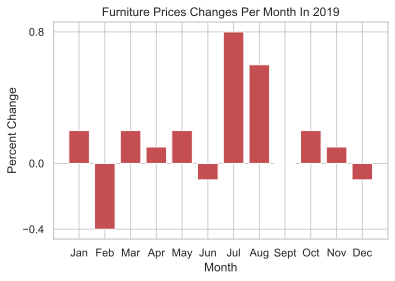

In [250]:
# view the percentage of change at prices every month at 2019 (monthely prices changes %)

Months_list = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
all_MPC_2019 =  df[df.Year == 2019]
all_MPC_2019 =  all_MPC_2019.MPC


plt.title('Furniture Prices Changes Per Month In 2019');
plt.xlabel('Month')
plt.ylabel('Percent Change');
ticks_y = np.array([min_MPC_2019,0,max_MPC_2019]) 
plt.yticks(ticks_y);

plt.bar(Months_list,all_MPC_2019,color='r');
sns.set_theme(style="whitegrid")

plt.savefig('bar chart of prices changes per month in 2019.png', dpi=150) # save the image

In [234]:
all_MPC_2019

0     0.2
1    -0.4
2     0.2
3     0.1
4     0.2
5    -0.1
6     0.8
7     0.6
8     0.0
9     0.2
10    0.1
11   -0.1
Name: MPC, dtype: float64

the highest increase in decrease furnishings, household equipment and routine household maintenance price is +0.8 in July 2019 ,
the highest decrease furnishings, household equipment and routine household maintenance prices is -0.4 in february 2019


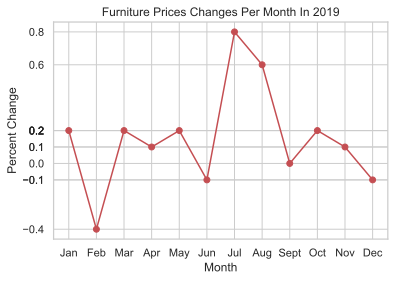

In [251]:
all_MPC_2019 # all value positive and nigative
positive_MPC_2019 = all_MPC_2019[all_MPC_2019 > 0]

plt.plot(Months_list,all_MPC_2019,color='r')  # all monthly price changes will appears as a line
plt.scatter(Months_list,all_MPC_2019,color='r')

plt.grid()
ticks_y = np.array(all_MPC_2019)
plt.yticks(ticks_y);

plt.title('Furniture Prices Changes Per Month In 2019');
plt.xlabel('Month')
plt.ylabel('Percent Change');
plt.grid()

plt.savefig('plot and scatter of prices changes per month in 2019.png', dpi=150) # save the image

In [236]:
# store rows that has positive percentage of change at prices annually and monthly at 2020

condition = (df.Year == 2019) & (df.APC > 0) & (df.MPC > 0)
positive_APC_MPC_2019 = df[condition]
positive_APC_MPC_2019

,Year,Month,APC,MPC
6,2019.0,Jul,0.8,0.8
7,2019.0,Aug,1.4,0.6
9,2019.0,Oct,1.9,0.2
10,2019.0,Nov,1.9,0.1


# Analysis data in 2020 to discover which month was the highest  prices changes

In [237]:
# store all rows has Year=2020
all_2020 = df[(df.Year == 2020) ] 

In [238]:
# the max value of prices changes per month at 2020
max_MPC_2020 = np.max( all_2020.MPC  )
max_MPC_2020 

7.3

In [239]:
# the min value of prices changes per month at 2020
min_MPC_2020 = np.min( all_2020.MPC  )
min_MPC_2020

-0.4

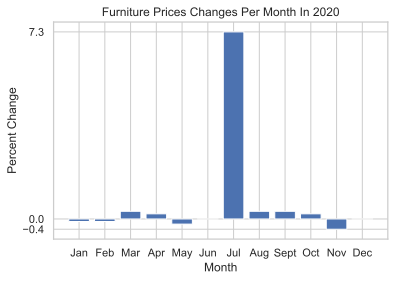

In [252]:
# view the percentage of change at prices every month at 2019 (monthely prices changes %)

Months_list = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
all_MPC_2020 =  df[df.Year == 2020]
all_MPC_2020 =  all_MPC_2020.MPC


plt.title('Furniture Prices Changes Per Month In 2020');
plt.xlabel('Month')
plt.ylabel('Percent Change');


ticks_y = np.array([min_MPC_2020,0,max_MPC_2020]) # 
plt.yticks(ticks_y);

plt.bar(Months_list,all_MPC_2020);
plt.savefig('bar chart of prices changes per month in 2020.png', dpi=300)

the highest increase in decrease furnishings, household equipment and routine household maintenance price is +7.3 in July 2019 , the highest decrease furnishings, household equipment and routine household maintenance prices is -0.4 in November 2019

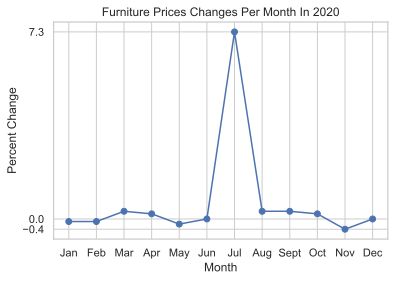

In [253]:
all_MPC_2020 # all value positive and nigative
positive_MPC_2020 = all_MPC_2020[all_MPC_2020 > 0]

plt.plot(Months_list,all_MPC_2020)  # all monthly price changes will appears as a line
plt.scatter(Months_list,all_MPC_2020);

ticks_y = np.array([min_MPC_2020,0,max_MPC_2020])
#ticks_y = np.array(all_MPC_2020) # charts will be not good quality 
plt.yticks(ticks_y);

plt.title('Furniture Prices Changes Per Month In 2020');
plt.xlabel('Month')
plt.ylabel('Percent Change');

plt.savefig('plot and scatter charts of prices changes per month in 2020.png', dpi=300) # save the image

In [242]:
# MPC_mean function to store and print monthly prices changes avgs per 2 month since 2019-2020
mean_per_month = []
def MPC_mean ():
    Months_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
    for m in Months_list:
        months_mean =  df[df.Month == m] 
        mean_MPC = statistics.mean(months_mean.MPC)
        mean_per_month.append(mean_MPC)
        print("Avrage",m,"prices changes in 2 years is", mean_MPC)
MPC_mean ()

Avrage Jan prices changes in 2 years is 0.05
Avrage Feb prices changes in 2 years is -0.25
Avrage Mar prices changes in 2 years is 0.25
Avrage Apr prices changes in 2 years is 0.15000000000000002
Avrage May prices changes in 2 years is 0.0
Avrage Jun prices changes in 2 years is -0.05
Avrage Jul prices changes in 2 years is 4.05
Avrage Aug prices changes in 2 years is 0.44999999999999996
Avrage Sept prices changes in 2 years is 0.15
Avrage Oct prices changes in 2 years is 0.2
Avrage Nov prices changes in 2 years is -0.15000000000000002
Avrage Dec prices changes in 2 years is -0.05


In [243]:
# check if avgs saved  
mean_per_month

[0.05,
 -0.25,
 0.25,
 0.15000000000000002,
 0.0,
 -0.05,
 4.05,
 0.44999999999999996,
 0.15,
 0.2,
 -0.15000000000000002,
 -0.05]

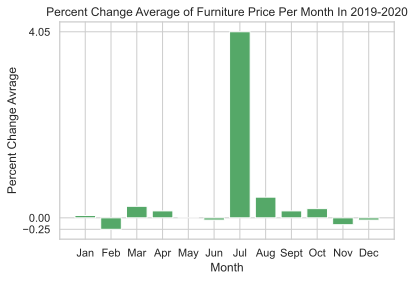

In [254]:
# show Prices Change Avrage Per Month
Months_list = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

plt.title('Percent Change Average of Furniture Price Per Month In 2019-2020');
plt.xlabel('Month')
plt.ylabel('Percent Change Avrage');

max_avg = np.max( mean_per_month  )
min_avg = np.min( mean_per_month  )
ticks_y = np.array([min_avg,0,max_avg]) 

#ticks_y = np.array(mean_per_month)
plt.yticks(ticks_y);

plt.bar(Months_list,mean_per_month,color='g');
plt.savefig('bar chart of prices changes avrages per month in 2019-2020.png', dpi=300) # save the image

# Result

## What is the best month to hold the furniture event?
July achieved: 

•	Highest consumer prices for furniture in 2019 

•	Highest consumer prices for furniture in 2020 

•	Highest arithmetic average over two years.